# Loan Defaulters Analysis

## Problem Definition:

1. In this case study, we will be **understanding basic risk analytics in banking and financial services**.
2. understand how data is used to **minimise the risk of losing money** while lending to customers.
3. This project **aims to analyze and predict Loan Defaulters** using machine learning classification algorithms.


### Business Understanding:
The loan providing companies **find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter**. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use Machine Learning Module to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan or not .
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:

1. If the **applicant is likely to repay the loan**, then **not approving the loan** results in a **loss of business to the company**
2. If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then **approving the loan** may lead to a **financial loss for the company**.


### Data Description:¶
The Data Consists of important key insights,Personal Details and Loan Approval insights like **LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default.**
These features are Definately taken into Consideration for the High Loan Amount as these features decides the growth of Bank's and Financial co. in the field of Lending money to Customers. By leveraging various classification algorithms, this study identifies the most influential factors and provides insights to predict Loan Defaulters among the customer.

I have selected this dataset **because we will be preparing Analysis module to this Dataset and by the end of module we can help Bank and Financial sectors to identify Loan Defaulters among customers. which help Banks,Fanancial co. from loosing Peoples Hard Earned money.**


### 1. Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2.Read the data

In [8]:
#Read Data
df=pd.read_csv('Loan_default.csv')
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24746,V9TIZKYVAZ,46,71509,184134,597,14,3,20.17,12,0.20,High School,Part-time,Divorced,Yes,No,Other,Yes,1
24747,EXXWXONZFZ,62,146177,65814,670,17,4,16.89,36,0.24,High School,Self-employed,Married,No,No,Home,Yes,1
24748,REDD1UUE0O,64,41671,84441,386,89,2,24.75,36,0.60,Master's,Part-time,Married,No,Yes,Auto,Yes,1
24749,SJPLJ3TCMY,35,22228,164117,373,30,3,19.86,24,0.25,High School,Full-time,Divorced,Yes,No,Other,Yes,1


## EDA (Exploratory Data Analysis)

### 1.Data Cleaning and Preprocessing

In [11]:
#Exploring columns in data
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [12]:
#Getting Short Information about Data(like columns,count,Null-values,Datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24751 entries, 0 to 24750
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          24751 non-null  object 
 1   Age             24751 non-null  int64  
 2   Income          24751 non-null  int64  
 3   LoanAmount      24751 non-null  int64  
 4   CreditScore     24751 non-null  int64  
 5   MonthsEmployed  24751 non-null  int64  
 6   NumCreditLines  24751 non-null  int64  
 7   InterestRate    24751 non-null  float64
 8   LoanTerm        24751 non-null  int64  
 9   DTIRatio        24751 non-null  float64
 10  Education       24751 non-null  object 
 11  EmploymentType  24751 non-null  object 
 12  MaritalStatus   24751 non-null  object 
 13  HasMortgage     24751 non-null  object 
 14  HasDependents   24751 non-null  object 
 15  LoanPurpose     24751 non-null  object 
 16  HasCoSigner     24751 non-null  object 
 17  Default         24751 non-null 

In [13]:
#Remove Duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
#Check Data Type 
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

### 2. Feature Engineering

In [16]:
# Drop unnecessary columns
df = df.drop(columns=['LoanID'])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24746,46,71509,184134,597,14,3,20.17,12,0.20,High School,Part-time,Divorced,Yes,No,Other,Yes,1
24747,62,146177,65814,670,17,4,16.89,36,0.24,High School,Self-employed,Married,No,No,Home,Yes,1
24748,64,41671,84441,386,89,2,24.75,36,0.60,Master's,Part-time,Married,No,Yes,Auto,Yes,1
24749,35,22228,164117,373,30,3,19.86,24,0.25,High School,Full-time,Divorced,Yes,No,Other,Yes,1


In [17]:
# Checking column wise Total Null count in data
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [18]:
# Handle Missing Data
df.dropna(inplace=True)

In [19]:
#To check datatypes:
df.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

### 3. Finding Outliers

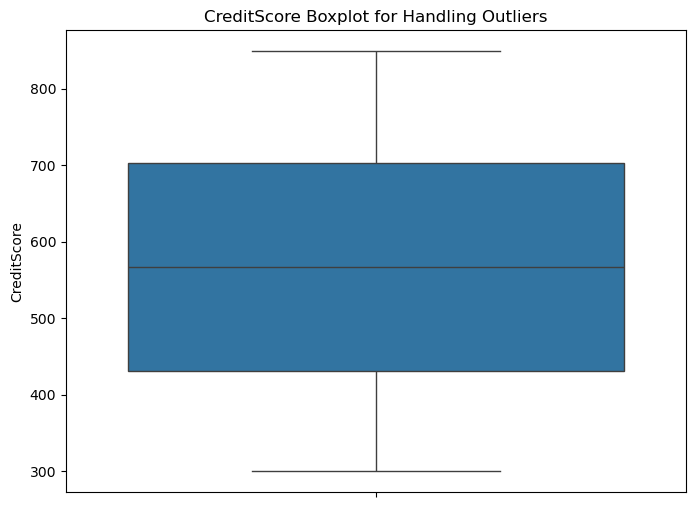

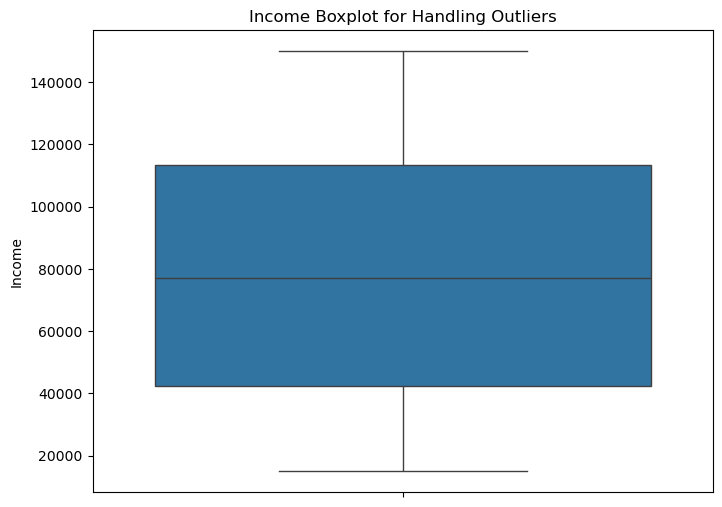

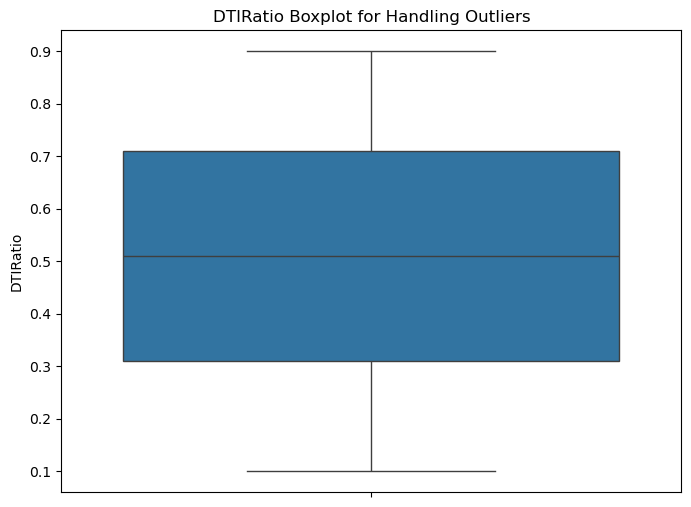

In [21]:
# Boxplot for Credit Score
plt.figure(figsize=(8, 6))
sns.boxplot(df['CreditScore'])
plt.title('CreditScore Boxplot for Handling Outliers')
plt.show()

# Boxplot for Income
plt.figure(figsize=(8, 6))
sns.boxplot(df['Income'])
plt.title('Income Boxplot for Handling Outliers')
plt.show()

# Boxplot for DTIRatio (Debt-to-Income)
plt.figure(figsize=(8, 6))
sns.boxplot(df['DTIRatio'])
plt.title('DTIRatio Boxplot for Handling Outliers')
plt.show()

### Conclusion :
The outliers in the data has been checked and we can observe that no outliers are present in the data.This cleaning process ensures more accurate model performance by eliminating extreme values that could skew results. The dataset is now ready for further analysis and modeling.

In [23]:
# Correlation Check
df.corr(numeric_only=True)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,0.015587,-0.014794,0.018492,0.022080,-0.016292,-0.033033,-0.004240,-0.007657,-0.266598
Income,0.015587,1.000000,-0.067234,0.004100,0.003755,-0.001934,-0.003633,-0.002015,0.006311,-0.157178
LoanAmount,-0.014794,-0.067234,1.000000,-0.009679,-0.001282,0.005190,0.016008,-0.010150,-0.004190,0.132611
CreditScore,0.018492,0.004100,-0.009679,1.000000,0.007364,0.007177,0.001538,-0.000632,0.011175,-0.057036
MonthsEmployed,0.022080,0.003755,-0.001282,0.007364,1.000000,-0.005695,-0.020613,-0.005684,0.002463,-0.139863
NumCreditLines,-0.016292,-0.001934,0.005190,0.007177,-0.005695,1.000000,0.003777,0.000347,-0.009158,0.046460
InterestRate,-0.033033,-0.003633,0.016008,0.001538,-0.020613,0.003777,1.000000,0.003790,0.001563,0.206267
LoanTerm,-0.004240,-0.002015,-0.010150,-0.000632,-0.005684,0.000347,0.003790,1.000000,-0.000312,0.005211
DTIRatio,-0.007657,0.006311,-0.004190,0.011175,0.002463,-0.009158,0.001563,-0.000312,1.000000,0.022118
Default,-0.266598,-0.157178,0.132611,-0.057036,-0.139863,0.046460,0.206267,0.005211,0.022118,1.000000


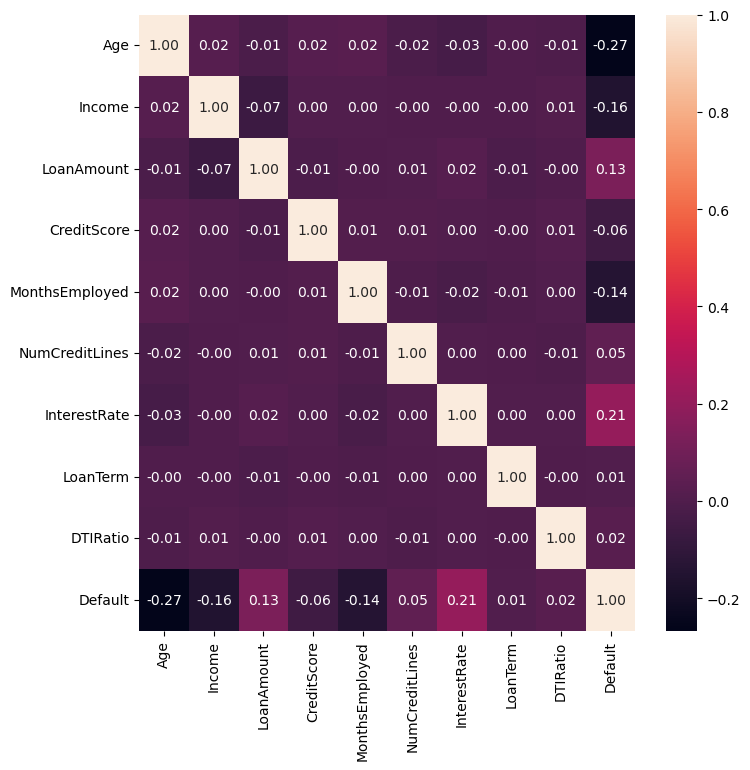

In [24]:
#Showing correlation by using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f')
plt.show()

### 3. Separation of features and target :

In [26]:
#Separation of features and target :
feature=df.iloc[:,:-1]
target=df['Default']

In [27]:
feature

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24746,46,71509,184134,597,14,3,20.17,12,0.20,High School,Part-time,Divorced,Yes,No,Other,Yes
24747,62,146177,65814,670,17,4,16.89,36,0.24,High School,Self-employed,Married,No,No,Home,Yes
24748,64,41671,84441,386,89,2,24.75,36,0.60,Master's,Part-time,Married,No,Yes,Auto,Yes
24749,35,22228,164117,373,30,3,19.86,24,0.25,High School,Full-time,Divorced,Yes,No,Other,Yes


In [28]:
target

0        0
1        0
2        1
3        0
4        0
        ..
24746    1
24747    1
24748    1
24749    1
24750    1
Name: Default, Length: 24751, dtype: int64

### 4. Finding skewness

In [30]:
#Descriptive statistics :
feature.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,24751.000000,24751.000000,24751.000000,24751.000000,24751.000000,24751.000000,24751.000000,24751.000000,24751.000000
mean,40.674478,78388.781746,134588.977698,569.187548,55.553351,2.528787,14.393881,36.082906,0.506692
std,14.880106,40195.672805,70674.692392,158.547417,34.480411,1.120917,6.650693,16.946516,0.229843
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,28.000000,42244.000000,74829.000000,431.500000,25.000000,2.000000,8.770000,24.000000,0.310000
50%,39.000000,77028.000000,137806.000000,567.000000,54.000000,3.000000,14.790000,36.000000,0.510000
75%,53.000000,113544.000000,196749.000000,703.000000,85.000000,4.000000,20.240000,48.000000,0.710000
max,69.000000,149997.000000,249992.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [31]:
#Numerical Columns :
col=feature.select_dtypes(['int64','float64']).columns
col

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')

Age
0.23365999273262744


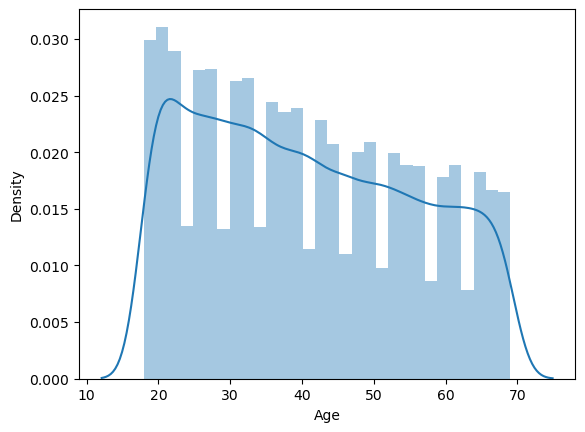

Income
0.09623474749308067


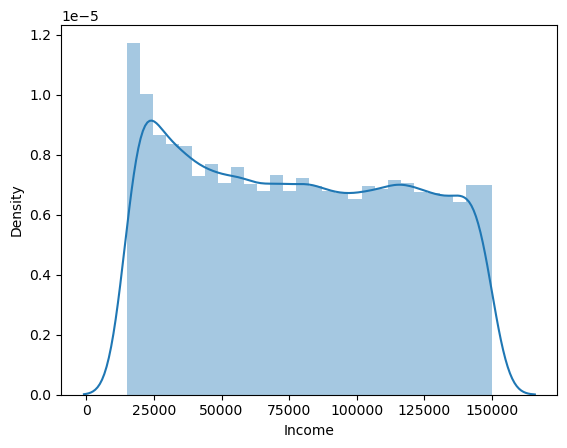

LoanAmount
-0.11612099338699439


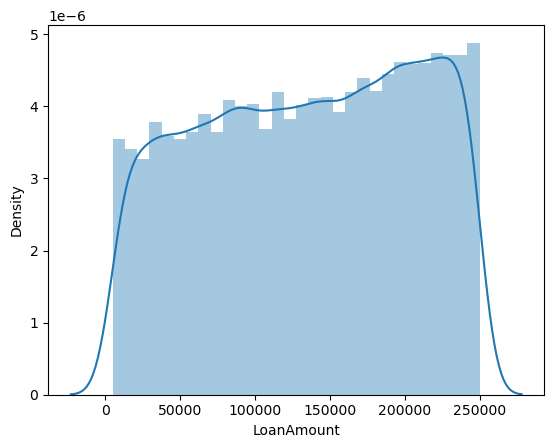

CreditScore
0.04363199651279171


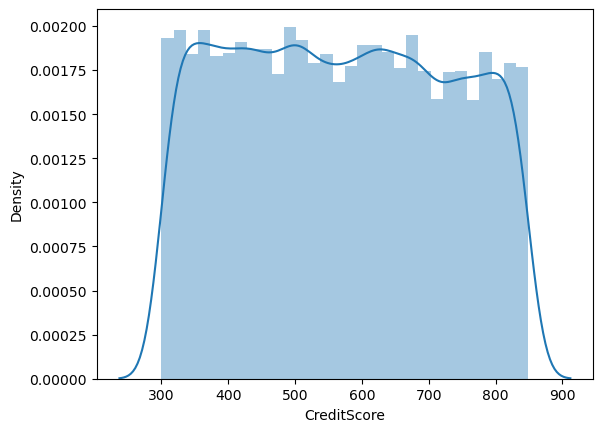

MonthsEmployed
0.127548813967136


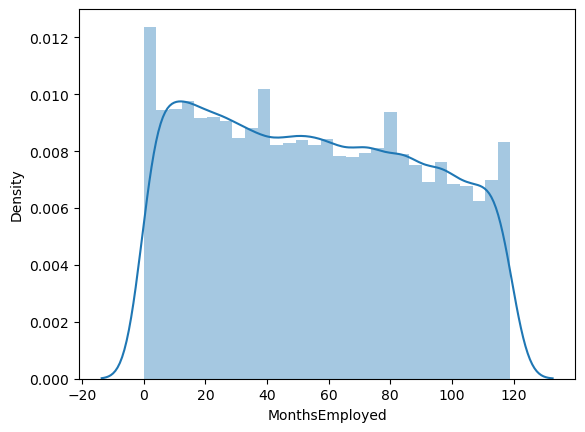

NumCreditLines
-0.031242984003027868


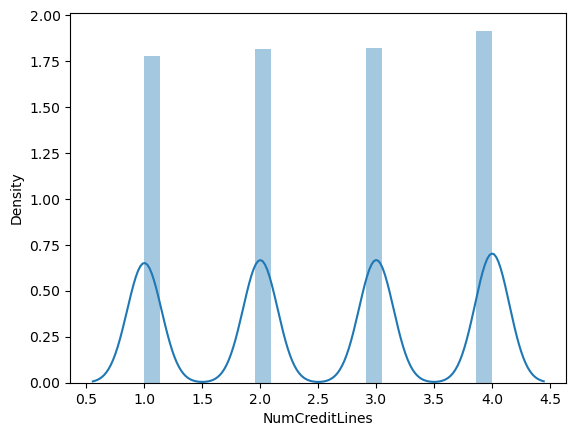

InterestRate
-0.15469626031843858


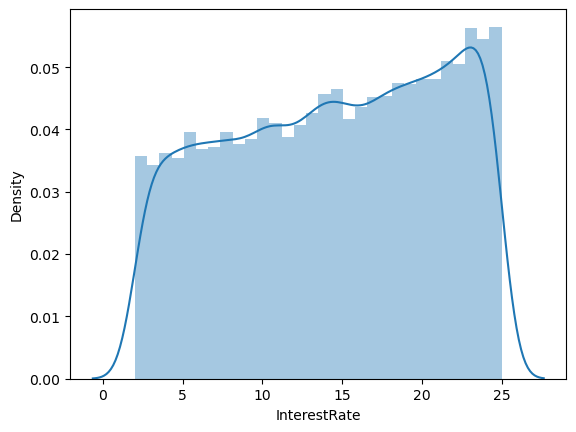

LoanTerm
-0.00878073613223776


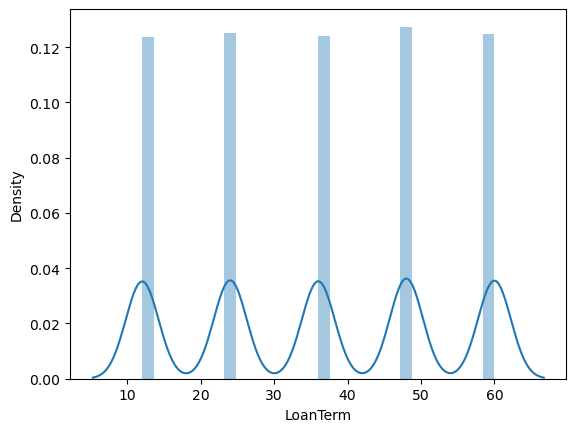

DTIRatio
-0.0398854906494274


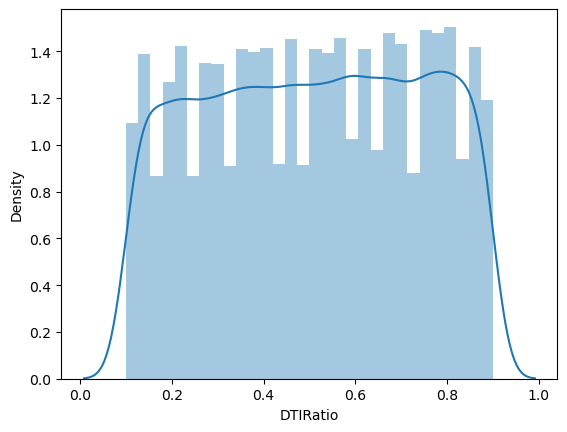

In [32]:
# To know amount of skewness :
from scipy.stats import skew   #scipy :scientific python library

for i in feature[col]:
    print(i)
    print(skew(feature[i]))
    
    plt.figure()
    sns.distplot(feature[i])
    plt.show()

In [33]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['Income'] = pt.fit_transform(df[['Income']])
df['LoanAmount'] = pt.fit_transform(df[['LoanAmount']])
df['MonthsEmployed'] = pt.fit_transform(df[['MonthsEmployed']])
df['InterestRate'] = pt.fit_transform(df[['InterestRate']])

# Check new skewness
Income_skewness = skew(df['Income'])
print(f"New skewness after Yeo-Johnson transformation: {Income_skewness:.4f}")

LoanAmount_skewness = skew(df['LoanAmount'])
print(f"New skewness after Yeo-Johnson transformation: {LoanAmount_skewness:.4f}")

MonthsEmployed_skewness = skew(df['MonthsEmployed'])
print(f"New skewness after Yeo-Johnson transformation: {MonthsEmployed_skewness:.4f}")

InterestRate_skewness = skew(df['InterestRate'])
print(f"New skewness after Yeo-Johnson transformation: {InterestRate_skewness:.4f}")

New skewness after Yeo-Johnson transformation: -0.1632
New skewness after Yeo-Johnson transformation: -0.2732
New skewness after Yeo-Johnson transformation: -0.2453
New skewness after Yeo-Johnson transformation: -0.2071


### 5. Encoding : Handling Categorical Data

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [36]:
cat_col=feature.select_dtypes(object).columns
cat_col

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [37]:
feature[cat_col]

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...
24746,High School,Part-time,Divorced,Yes,No,Other,Yes
24747,High School,Self-employed,Married,No,No,Home,Yes
24748,Master's,Part-time,Married,No,Yes,Auto,Yes
24749,High School,Full-time,Divorced,Yes,No,Other,Yes


In [38]:
feature[cat_col]=oe.fit_transform(feature[cat_col])

In [39]:
feature

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0.0,0.0,0.0,1.0,1.0,4.0,1.0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,0.0,1.0,0.0,0.0,4.0,1.0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,3.0,0.0,1.0,1.0,0.0,0.0
3,32,31713,44799,743,0,3,7.07,24,0.23,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,60,20437,9139,633,8,4,6.51,48,0.73,0.0,3.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24746,46,71509,184134,597,14,3,20.17,12,0.20,1.0,1.0,0.0,1.0,0.0,4.0,1.0
24747,62,146177,65814,670,17,4,16.89,36,0.24,1.0,2.0,1.0,0.0,0.0,3.0,1.0
24748,64,41671,84441,386,89,2,24.75,36,0.60,2.0,1.0,1.0,0.0,1.0,0.0,1.0
24749,35,22228,164117,373,30,3,19.86,24,0.25,1.0,0.0,0.0,1.0,0.0,4.0,1.0


### 6. Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
feature.iloc[:,:]=sc.fit_transform(feature.iloc[:,:])

In [42]:
x=feature
y=target

In [43]:
x

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,1.029954,0.189209,-1.188596,-0.310245,0.709015,1.312536,0.125722,-0.004892,-0.290170,-1.314599,-1.396264,-1.208365,1.036587,1.037761,1.421057,1.037845
1,1.903622,-0.695531,-0.143604,-0.701303,-1.176151,-1.363899,-1.441064,1.411357,0.754041,0.477072,-1.396264,0.002544,-0.964705,-0.963613,1.421057,1.037845
2,0.357903,0.144775,-0.076422,-0.745455,-0.857123,0.420391,1.018880,-0.713017,-0.855784,0.477072,1.306750,-1.208365,1.036587,1.037761,-1.401273,-0.963535
3,-0.582970,-1.161238,-1.270494,1.096303,-1.611189,0.420391,-1.101243,-0.713017,-1.203855,-0.418764,-1.396264,0.002544,-0.964705,-0.963613,-0.695690,-0.963535
4,1.298775,-1.441771,-1.775070,0.402490,-1.379169,1.312536,-1.185446,0.703232,0.971585,-1.314599,1.306750,-1.208365,-0.964705,1.037761,-1.401273,-0.963535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24746,0.357903,-0.171161,0.701043,0.175424,-1.205154,0.420391,0.868516,-1.421141,-1.334381,-0.418764,-0.495260,-1.208365,1.036587,-0.963613,1.421057,1.037845
24747,1.433186,1.686490,-0.973140,0.635863,-1.118146,1.312536,0.375325,-0.004892,-1.160346,-0.418764,0.405745,0.002544,-0.964705,-0.963613,0.715474,1.037845
24748,1.567596,-0.913494,-0.709575,-1.155435,0.970038,-0.471754,1.557180,-0.004892,0.405971,0.477072,-0.495260,0.002544,-0.964705,1.037761,-1.401273,1.037845
24749,-0.381354,-1.397213,0.417810,-1.237431,-0.741113,0.420391,0.821904,-0.713017,-1.116837,-0.418764,-1.396264,-1.208365,1.036587,-0.963613,1.421057,1.037845


In [44]:
y

0        0
1        0
2        1
3        0
4        0
        ..
24746    1
24747    1
24748    1
24749    1
24750    1
Name: Default, Length: 24751, dtype: int64

### 7. Splitting Data into Training and Testing :

In [46]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=85)

# Check the shape of training and test sets
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((19800, 16), (4951, 16), (19800,), (4951,))

## Classification Algorithms :

### 1. KNN(K-Nearest Neighbour) Algorithm

#### Train the Model :

In [200]:
#import class from Library module
from sklearn.neighbors import KNeighborsClassifier 

# Initialize the kNN model
k=3
knn = KNeighborsClassifier(n_neighbors=k)  #k = Number of neighbors

# Train the model
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

### Make Predictions and Evaluate

In [52]:
# Predict on the test set
ypred = knn.predict(xtest)

In [53]:
#To evaluate a model
from sklearn.metrics import accuracy_score          #this metrics used to check accuracy
accuracy_score(ypred,ytest)

0.6035144415269642

In [54]:
#This class helps to identify best parameters of respective algorithm which affect accuracy score.
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid={'n_neighbors':[3,5,7,9,11],'metric':['euclidean','manhattan','hamming','minkowski']}

In [56]:
gs=GridSearchCV(knn,param_grid,cv=5)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)

In [57]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [58]:
accuracy_score(ytest,ypred)

0.6445162593415472

### Hypertuning of k
To find best value of k

In [60]:
acc_list=[]
for i in range(1,51):
    kn1=KNeighborsClassifier(n_neighbors=i)
    kn1.fit(xtrain,ytrain)
    ypred=kn1.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    acc_list.append(ac)

In [61]:
acc_list

[0.5786709755604929,
 0.5907897394465764,
 0.6035144415269642,
 0.6083619470813977,
 0.6200767521712786,
 0.6255301959200161,
 0.6309836396687538,
 0.6382548980004039,
 0.6388608361947081,
 0.6406786507776207,
 0.6445162593415472,
 0.6443142799434458,
 0.6465360533225611,
 0.6493637648959806,
 0.6515855382750959,
 0.6536053322561098,
 0.6586548172086447,
 0.654211270450414,
 0.6582508584124419,
 0.6580488790143405,
 0.6612805493839629,
 0.6568370026257322,
 0.6568370026257322,
 0.6540092910523126,
 0.6580488790143405,
 0.659866693597253,
 0.6624924257725712,
 0.662896384568774,
 0.6616845081801657,
 0.6645122197535851,
 0.667541910725106,
 0.6649161785497879,
 0.6645122197535851,
 0.667541910725106,
 0.6691577459099172,
 0.6697636841042214,
 0.66956170470612,
 0.6687537871137144,
 0.670571601696627,
 0.6709755604928297,
 0.6756210866491618,
 0.6683498283175117,
 0.6744092102605534,
 0.6715814986871339,
 0.6711775398909311,
 0.673197333871945,
 0.6738032720662492,
 0.6750151484548575,
 

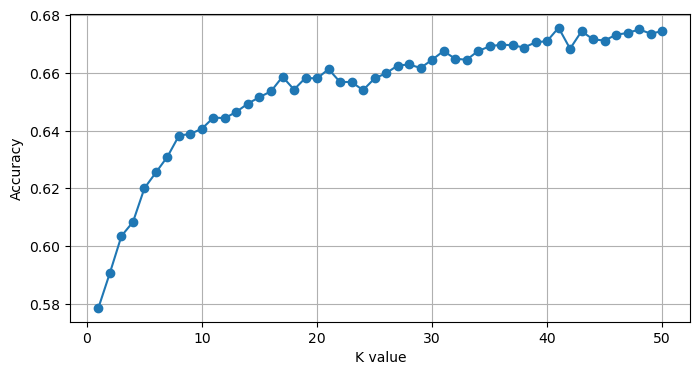

In [62]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),acc_list,marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [63]:
# Initialize the kNN model
k = 20  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=20)

In [64]:
# Predict on the test set
ypred = knn.predict(xtest)

In [65]:
#To evaluate a model
from sklearn.metrics import accuracy_score         #this metrics used to check accuracy
accuracy_score(ytest,ypred)

0.6580488790143405

### Conclusion:
The K-Nearest Neighbors (KNN) algorithm was used to classify the dataset, achieving an initial accuracy of 65.00%. To enhance the model's performance, hyperparameter tuning was conducted using GridSearchCV. By selecting the optimal parameters (gs.best_params_), the accuracy improved to 65.80%. This demonstrates the importance of fine-tuning hyperparameters to achieve better classification results.

### 2. Logistic Regression :

In [68]:
#Building model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [69]:
#Evaluate a model
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



In [70]:
#Building model
#from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



In [71]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



In [72]:
lr=LogisticRegression(solver='sag')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



In [73]:
lr=LogisticRegression(solver='saga')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



### Conclusion :
The logistic regression model achieved a consistent accuracy of 73% across different solvers (default, liblinear,newton-cg, sag, and saga), indicating stable performance and robustness. This suggests that the data is relatively simple, and the solver choice has minimal impact on accuracy.

### 3. Support Vector Machine (SVM)

In [76]:
from sklearn.svm import SVC
svc=SVC()

def mymodel(m):
    m.fit(xtrain,ytrain)
    ypred=m.predict(xtest)
    print(classification_report(ytest,ypred))
    return m

In [77]:
mymodel(svc)
SVC()

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      2632
           1       0.69      0.63      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



SVC()

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
p1=Pipeline(steps=[('scaling',StandardScaler()),('svm',SVC()),])

In [80]:
p1.fit(xtrain,ytrain)
ypred=p1.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      2632
           1       0.69      0.63      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



### Hypertuning with kernel,c,gamma :

In [82]:
svc=SVC(kernel='linear')
mymodel(svc)
SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.67      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



SVC(kernel='linear')

In [83]:
svc=SVC(kernel='sigmoid')
mymodel(svc)
SVC(kernel='sigmoid')

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      2632
           1       0.59      0.57      0.58      2319

    accuracy                           0.61      4951
   macro avg       0.61      0.61      0.61      4951
weighted avg       0.61      0.61      0.61      4951



SVC(kernel='sigmoid')

In [84]:
svc=SVC(kernel='poly')
mymodel(svc)
SVC(kernel='poly')

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2632
           1       0.67      0.66      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



SVC(kernel='poly')

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid={'C':[1,10],'gamma':[1,10],'kernel':['rbf']}

In [87]:
gd=GridSearchCV(svc,param_grid,verbose=3)
#Verbose is not a hyperparameter.It is used just to display info
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.534 total time= 1.5min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.532 total time= 1.6min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.536 total time= 1.5min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.536 total time= 1.5min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.533 total time= 1.5min
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.531 total time= 1.5min
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.531 total time= 1.5min
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.532 total time= 1.5min
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.532 total time= 1.5min
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.532 total time= 1.5min
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.540 total time= 1.9min
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [88]:
gd.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [89]:
svc=gd.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      2632
           1       0.68      0.05      0.10      2319

    accuracy                           0.54      4951
   macro avg       0.61      0.52      0.40      4951
weighted avg       0.60      0.54      0.42      4951



### Conclusion:
The Support Vector Machine achieve 75% accuracy. Again here done hypertune with kernel(linear,poly) for search better accuaacy but accuracy allmost remains same.

## 4. Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [93]:
mymodel(dt)
DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      2632
           1       0.56      0.55      0.56      2319

    accuracy                           0.59      4951
   macro avg       0.59      0.59      0.59      4951
weighted avg       0.59      0.59      0.59      4951



DecisionTreeClassifier()

In [94]:
#To check accuracy during training
dt.score(xtrain,ytrain)              #overfitting problem

1.0

### Hypertuning in DT (Pruning techniques)

In [96]:
for i in range(1,31):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"Max Depth={i} Accuracy={ac}")

Max Depth=1 Accuracy=0.623914360735205
Max Depth=2 Accuracy=0.6406786507776207
Max Depth=3 Accuracy=0.6624924257725712
Max Depth=4 Accuracy=0.6721874368814381
Max Depth=5 Accuracy=0.6740052514643506
Max Depth=6 Accuracy=0.6768329630377702
Max Depth=7 Accuracy=0.6687537871137144
Max Depth=8 Accuracy=0.6671379519289032
Max Depth=9 Accuracy=0.6614825287820643
Max Depth=10 Accuracy=0.6544132498485155
Max Depth=11 Accuracy=0.6449202181377499
Max Depth=12 Accuracy=0.6255301959200161
Max Depth=13 Accuracy=0.6140173702282368
Max Depth=14 Accuracy=0.613613411432034
Max Depth=15 Accuracy=0.5948293274086043
Max Depth=16 Accuracy=0.5970511007877196
Max Depth=17 Accuracy=0.5930115128256918
Max Depth=18 Accuracy=0.585942233892143
Max Depth=19 Accuracy=0.5889719248636639
Max Depth=20 Accuracy=0.585942233892143
Max Depth=21 Accuracy=0.5938194304180974
Max Depth=22 Accuracy=0.5883659866693597
Max Depth=23 Accuracy=0.5863461926883458
Max Depth=24 Accuracy=0.585942233892143
Max Depth=25 Accuracy=0.583922

In [97]:
dt2=DecisionTreeClassifier(max_depth=6)
mymodel(dt2)
DecisionTreeClassifier(max_depth=6)

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      2632
           1       0.69      0.57      0.62      2319

    accuracy                           0.68      4951
   macro avg       0.68      0.67      0.67      4951
weighted avg       0.68      0.68      0.67      4951



DecisionTreeClassifier(max_depth=6)

In [98]:
dt2.score(xtrain,ytrain)

0.6801515151515152

In [99]:
#Hypertuning with mean_samples_split
for i in range(2,51):
    dt1=DecisionTreeClassifier(min_samples_split=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min samples split={i} Accuracy={ac}")

min samples split=2 Accuracy=0.5922035952332863
min samples split=3 Accuracy=0.584932336901636
min samples split=4 Accuracy=0.58695213088265
min samples split=5 Accuracy=0.5877600484750556
min samples split=6 Accuracy=0.5895778630579681
min samples split=7 Accuracy=0.5899818218541709
min samples split=8 Accuracy=0.5913956776408806
min samples split=9 Accuracy=0.5942233892143002
min samples split=10 Accuracy=0.5942233892143002
min samples split=11 Accuracy=0.5942233892143002
min samples split=12 Accuracy=0.5930115128256918
min samples split=13 Accuracy=0.5960412037972127
min samples split=14 Accuracy=0.593617451019996
min samples split=15 Accuracy=0.5917996364370834
min samples split=16 Accuracy=0.591597657038982
min samples split=17 Accuracy=0.5930115128256918
min samples split=18 Accuracy=0.5938194304180974
min samples split=19 Accuracy=0.5974550595839224
min samples split=20 Accuracy=0.5962431831953141
min samples split=21 Accuracy=0.5986669359725308
min samples split=22 Accuracy=0.6

In [100]:
dt3=DecisionTreeClassifier(min_samples_split=49)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2632
           1       0.61      0.58      0.60      2319

    accuracy                           0.63      4951
   macro avg       0.63      0.63      0.63      4951
weighted avg       0.63      0.63      0.63      4951



DecisionTreeClassifier(min_samples_split=49)

In [101]:
DecisionTreeClassifier(min_samples_split=49)

DecisionTreeClassifier(min_samples_split=49)

In [102]:
dt3.score(xtrain,ytrain)

0.7704040404040404

In [103]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min samples split={i} Accuracy={ac}")

min samples split=1 Accuracy=0.5861442132902444
min samples split=2 Accuracy=0.5952332862048071
min samples split=3 Accuracy=0.5938194304180974
min samples split=4 Accuracy=0.6071500706927894
min samples split=5 Accuracy=0.610583720460513
min samples split=6 Accuracy=0.6065441324984852
min samples split=7 Accuracy=0.6057362149060795
min samples split=8 Accuracy=0.6087659058776005
min samples split=9 Accuracy=0.6109876792567158
min samples split=10 Accuracy=0.6109876792567158
min samples split=11 Accuracy=0.6178549787921632
min samples split=12 Accuracy=0.6176529993940618
min samples split=13 Accuracy=0.6235104019390022
min samples split=14 Accuracy=0.6220965461522925
min samples split=15 Accuracy=0.6245202989295092
min samples split=16 Accuracy=0.6281559280953343
min samples split=17 Accuracy=0.6332054130478691
min samples split=18 Accuracy=0.6368410422136942
min samples split=19 Accuracy=0.63623510401939
min samples split=20 Accuracy=0.6366390628155928
min samples split=21 Accuracy=0.

In [104]:
dt4=DecisionTreeClassifier(min_samples_leaf=35)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      2632
           1       0.64      0.59      0.62      2319

    accuracy                           0.65      4951
   macro avg       0.65      0.65      0.65      4951
weighted avg       0.65      0.65      0.65      4951



DecisionTreeClassifier(min_samples_leaf=35)

In [105]:
DecisionTreeClassifier(min_samples_leaf=19)

DecisionTreeClassifier(min_samples_leaf=19)

In [106]:
dt4.score(xtrain,ytrain)

0.7226262626262626

### Conclusion :
The Decision Tree model initially achieved an accuracy of 71% without hyperparameter tuning. After applying hyperparameter tuning, various parameters were adjusted to optimize the model performance:

max_depth resulted in an accuracy of 68%,

min_samples_split improved the accuracy to 77%, and

min_samples_leaf yielded an accuracy of 72%.

These improvements indicate that hyperparameter tuning significantly enhanced the model's performance, with min_samples_split providing the best results. Therefore, tuning these parameters helps improve the model's ability to generalize and achieve better predictive accuracy.

## 5. Ensemble Learning

### 1.1)Bagging

In [110]:
from sklearn.ensemble import BaggingClassifier

In [111]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2632
           1       0.68      0.65      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



In [112]:
bg=BaggingClassifier(KNeighborsClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2632
           1       0.60      0.58      0.59      2319

    accuracy                           0.62      4951
   macro avg       0.62      0.62      0.62      4951
weighted avg       0.62      0.62      0.62      4951



In [113]:
bg=BaggingClassifier(SVC())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2632
           1       0.69      0.61      0.65      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.68      0.68      4951
weighted avg       0.69      0.69      0.68      4951



In [114]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      2632
           1       0.65      0.53      0.58      2319

    accuracy                           0.64      4951
   macro avg       0.64      0.64      0.64      4951
weighted avg       0.64      0.64      0.64      4951



### Random Forest :

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2632
           1       0.68      0.61      0.64      2319

    accuracy                           0.68      4951
   macro avg       0.68      0.68      0.68      4951
weighted avg       0.68      0.68      0.68      4951



### Conclusion :
By applying Bagging from Ensemble Learning, the Logistic Regression Classifier & Support Vector Classifier(SVC) outperforms other models with the best accuracy of 72%. This result highlights the effectiveness of ensemble methods in improving model performance. Bagging helps in reducing variance and overfitting, and in this case, the Logistic Regression Classifier benefits from this technique, delivering a more robust and reliable prediction compared to other classifiers tested.

### 1.2) Voting

In [120]:
from sklearn.ensemble import VotingClassifier

In [121]:
models=[]
acc=[]
models.append(("LogisticReg",LogisticRegression()))
models.append(("Dec Tree",DecisionTreeClassifier()))
models.append(("knn",KNeighborsClassifier()))
models.append(("svm",SVC()))

In [122]:
vc=VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      2632
           1       0.71      0.56      0.63      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.68      0.68      4951
weighted avg       0.69      0.69      0.68      4951



### Conclusion :
The Voting Classifier combines multiple models (Logistic Regression, Decision Tree, K-Nearest Neighbors, and SVM) and achieves 73% accuracy for f1 Score and 79% accuracy for recall.

### 2) Boosting

In [125]:
from sklearn.ensemble import AdaBoostClassifier

In [126]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2632
           1       0.68      0.65      0.67      2319

    accuracy                           0.70      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.70      0.69      4951



In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2632
           1       0.69      0.63      0.66      2319

    accuracy                           0.69      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.69      0.69      4951



In [129]:
from xgboost import XGBClassifier

In [130]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2632
           1       0.66      0.62      0.64      2319

    accuracy                           0.67      4951
   macro avg       0.67      0.67      0.67      4951
weighted avg       0.67      0.67      0.67      4951



### Conclusion :
AdaBoost achieved an accuracy of 73%, showing strong performance with better recall and f1-score for class 0.

Gradient Boosting also gave an accuracy of 75%, performing similarly to AdaBoost with balanced recall and f1-score.

XGBoost achieved an accuracy of 72%, slightly lower than the other two but still a competitive result.

In summary, AdaBoost & Gradient Boosting provides the best performance among the boosting algorithms tested.

## 6. Naive Bay's

In [133]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report

In [134]:
mymodel(GaussianNB())
GaussianNB()

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2632
           1       0.68      0.66      0.67      2319

    accuracy                           0.70      4951
   macro avg       0.69      0.69      0.69      4951
weighted avg       0.69      0.70      0.70      4951



GaussianNB()

In [135]:
mymodel(BernoulliNB())
BernoulliNB()

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2632
           1       0.65      0.60      0.62      2319

    accuracy                           0.66      4951
   macro avg       0.66      0.66      0.66      4951
weighted avg       0.66      0.66      0.66      4951



BernoulliNB()

### Conclusion:
The Naïve Bayes classifier for the Loan Defaulter analysis project, specifically implementing GaussianNB and BernoulliNB.Among them, GaussianNB achieved the highest accuracy of 73%

## Conclusion:
This Loan Defaulter Analysis project aimed to predict Loan Defaulters Among the customer using various classification algorithms, Through extensive experimentation with different machine learning models, the highest accuracy of 73% to 75% was achieved using Logistic Regression, Support Vector Machine (SVM), Ensemble Learning (Bagging and Boosting).


## End User
The end users of this project include Govt. Banks, Private Banks, Finance Co. , etc.

Banks and Finance co. can use the insights to understand factors influencing Person from being Loan Defaulter.

Banks and Finance co. can use the analysis to identify whether Person is Loan Defaulter or not and whether Bank,Finance co. should Grant Him/Her Loan.
